# I. High-Level Outline and Brief Background

## 1. What is the problem?

The core problem is the high volume of hotel booking cancellations. The company is facing a significant number of confirmed bookings that do not materialize, making it difficult to forecast occupancy and revenue accurately. The task is to build a machine learning model, specifically a decision tree, to predict which bookings are at high risk of being canceled (i.e., classifying the is_canceled target variable).

## 2. Why is it important?

Solving this problem is crucial for financial and operational reasons:

Financial Stability: Cancellations lead directly to lost revenue from empty, unsold rooms. By predicting cancellations, the hotel can adjust its overbooking strategy, offer last-minute deals, or target at-risk bookings with incentives to confirm, thus protecting revenue streams.

Operational Efficiency: Unpredictable occupancy disrupts resource management. Accurate predictions help optimize staffing for housekeeping, front desk, and food & beverage services. It also aids in managing inventory (like food supplies) more effectively, reducing waste and costs.

Improved Pricing Strategy: Understanding why and when cancellations occur allows the revenue management team to refine pricing models, non-refundable deposit policies, and cancellation fee structures to minimize their impact.

## 3. Who are the key stakeholders?

The key stakeholders involved in or affected by this project include:

Hotel Management (e.g., General Managers, Regional Directors): They are responsible for the overall profitability and smooth operation of the hotels.

Revenue Management Team: This team is directly responsible for setting room prices, managing inventory, and maximizing revenue per available room (RevPAR). They will be the primary users of this model.

Operations Teams (Front Desk, Housekeeping): Their daily planning and staffing levels are directly dependent on accurate occupancy forecasts.

Marketing and Sales Teams: They can use insights from the model to tailor promotions, loyalty offers, or communication strategies to reduce cancellations.

Finance Department: This department is concerned with accurate revenue forecasting and budgeting, which is undermined by unpredictable cancellations.

In [ ]:
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Change directory to your 'Colab Notebooks' folder
#    Make sure your file is in this folder
%cd /content/drive/MyDrive/Colab Notebooks

# 3. Verify the current directory
print(f"Current working directory: {os.getcwd()}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks
Current working directory: /content/drive/MyDrive/Colab Notebooks


In [ ]:
# --------------------------------------
# SECTION 1 — STEP 1: Load & Inspect Data
# --------------------------------------

import pandas as pd

# Load dataset
# --- CHANGED --- (Make sure 'hotel_bookings.csv' is in the same folder as your notebook)
df = pd.read_csv("hotel_bookings.csv")

# Display first few rows
print("Preview of hotel_bookings dataset:")
# --- CHANGED ---
print(df.head())

# Show shape (number of rows & columns)
print("Dataset shape:", df.shape)

# Show column names
print("Columns:", list(df.columns))

# Basic info (data types, missing values)
print("\nDataset Information:")
df.info()

# Summary statistics for numeric features
print("\nSummary Statistics:")
# --- CHANGED ---
print(df.describe())

# Distribution of target variable
print("\nTarget Variable Distribution (is_canceled):")
print(df["is_canceled"].value_counts())

Preview of hotel_bookings dataset:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   

# II. Data Section

Missing values per column:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                         

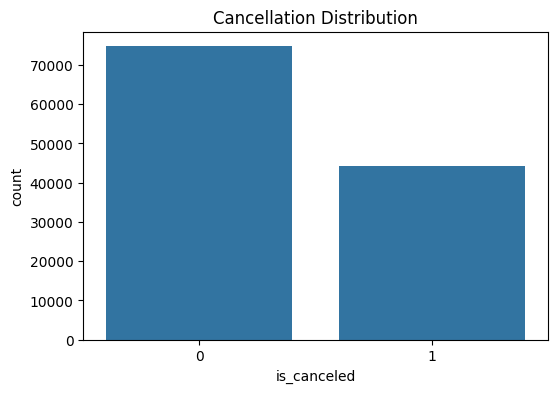

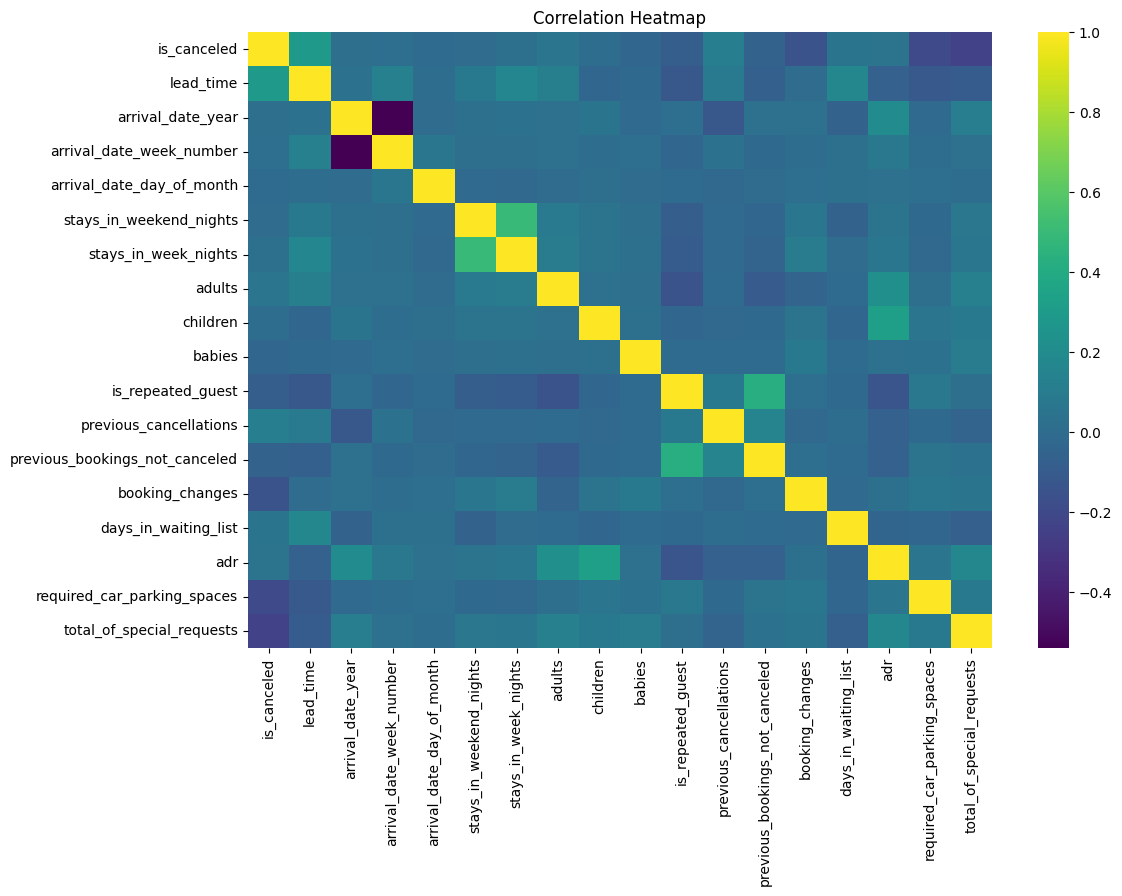


Train and Test Shapes:
X_train: (95118, 244)
X_test: (23780, 244)
y_train: (95118,)
y_test: (23780,)


In [ ]:
# --------------------------------------
# SECTION 2 — DATA CLEANING & EDA
# --------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Keep this import

# STEP 1: Load the data
df = pd.read_csv("hotel_bookings.csv")

# --------------------------------------
# STEP 2: MISSING VALUE HANDLING
# --------------------------------------

# Count missing values per column
missing_counts = df.isnull().sum()
print("Missing values per column:")
# --- CHANGED ---
print(missing_counts)

# ... (rest of your missing value code: columns_to_drop, df.drop) ...
df = df.drop(columns=columns_to_drop)

# ... (rest of your missing value code: columns_with_small_missing, df.dropna) ...
df = df.dropna(subset=columns_with_small_missing)

# Confirm missing values removed
print("\nRemaining missing values after cleaning:")
print(df.isnull().sum())

# --------------------------------------
# STEP 3: BASIC EDA
# --------------------------------------

print("\nUpdated Dataset Shape:", df.shape)

# Summary statistics
print("\nSummary Statistics:")
# --- CHANGED ---
print(df.describe())

# Distribution of target variable
print("\nTarget variable distribution (is_canceled):")
print(df["is_canceled"].value_counts())

# ... (all your plotting code: countplot, heatmap) ...
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="is_canceled")
plt.title("Cancellation Distribution")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

# --------------------------------------
# STEP 4: TRAIN/TEST SPLIT
# --------------------------------------
# (This part is correct as you have it in Cell 4 and 5)

# Separate features and target
X = df.drop("is_canceled", axis=1)
y = df["is_canceled"]

# Convert categorical variables with get_dummies
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain and Test Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

In [ ]:
# --- This code should come AFTER your train/test split ---

from sklearn.preprocessing import StandardScaler

# 1. Identify numerical columns to scale
#    (Note: You should only scale numeric features, not your one-hot encoded columns
#     if you use a ColumnTransformer. If you scaled everything after get_dummies,
#     that's also an option, but be mindful of what you're scaling.)

# A simple approach is to scale all columns *after* pd.get_dummies
scaler = StandardScaler()

# 2. FIT the scaler ONLY on the training data
X_train_scaled = scaler.fit_transform(X_train)

# 3. TRANSFORM the test data using the *same* scaler
X_test_scaled = scaler.transform(X_test)

# 4. Now, use X_train_scaled and X_test_scaled in section 3.3
#    e.g., model_knn.fit(X_train_scaled, y_train)
#    e.g., y_pred_knn = model_knn.predict(X_test_scaled)

# III. Model

## 3.1 Decision Tree Construction

Task: Build a decision tree classifier.



Step 2 Complete: Model trained with max_depth=5.

--- Step 3: Decision Tree Visualization ---


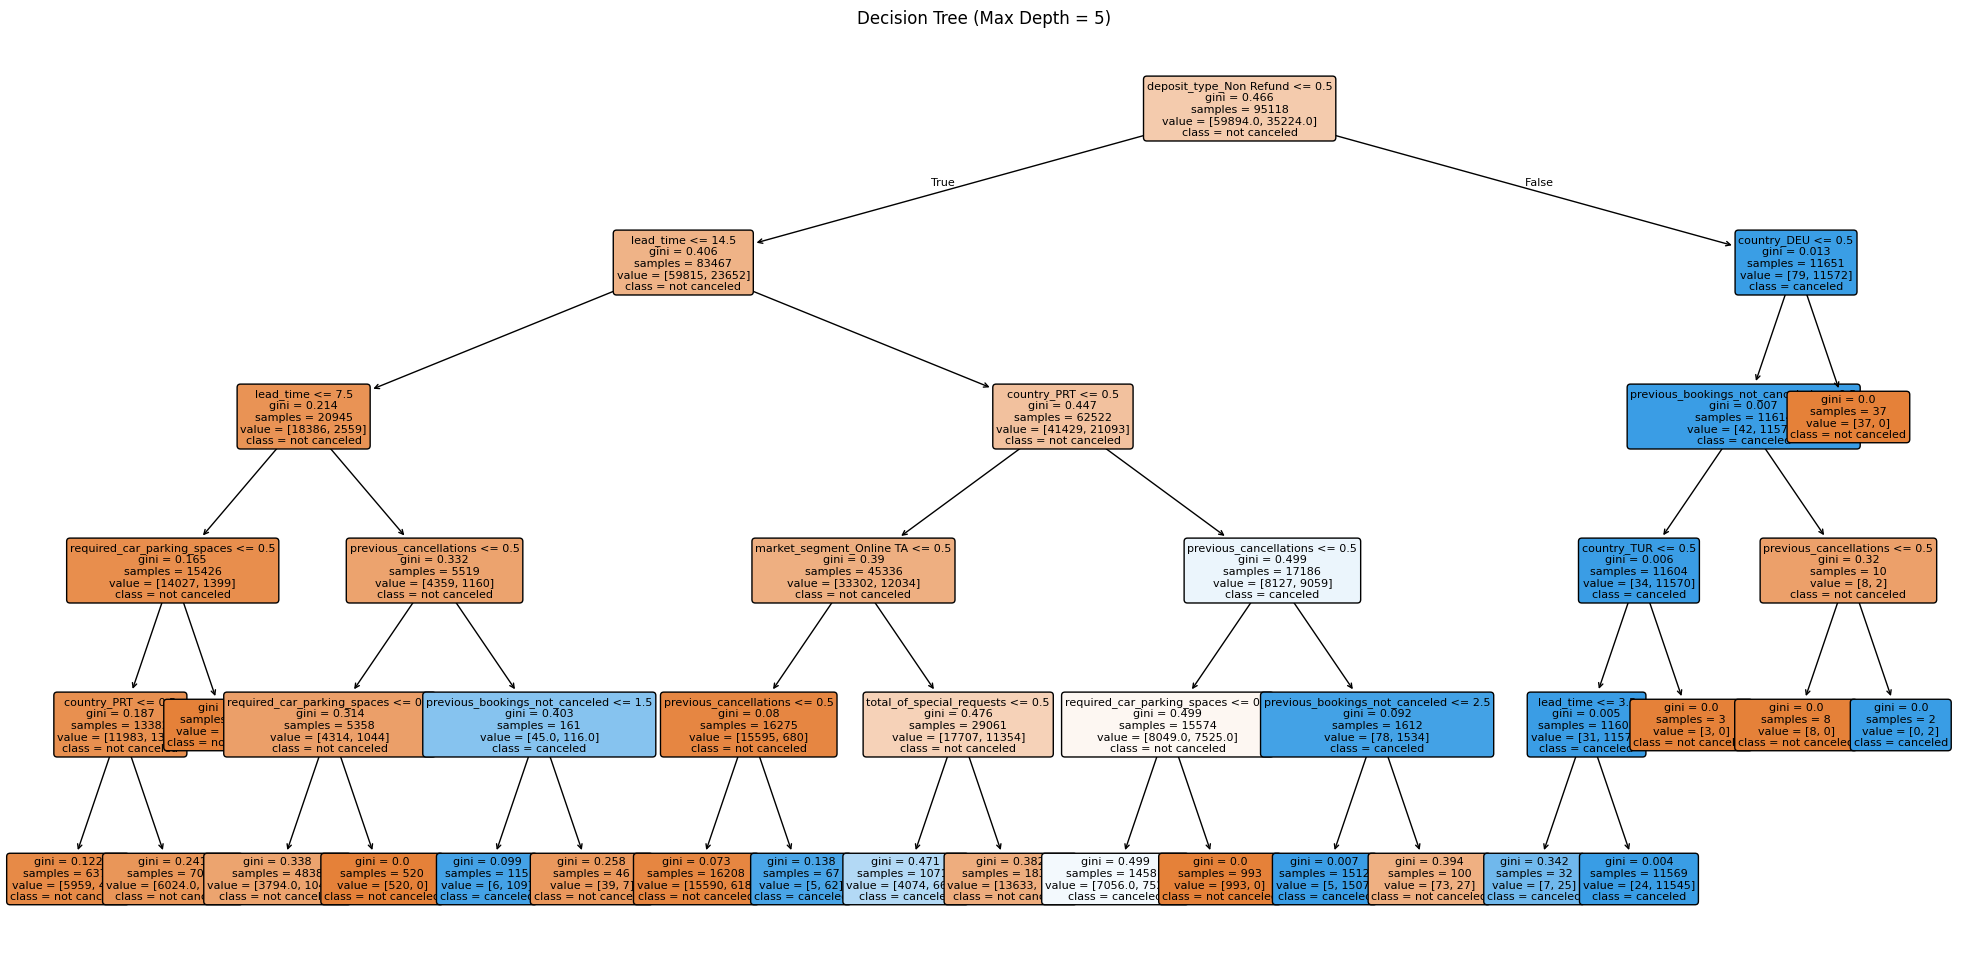


--- Step 4 Complete: Predictions made on test set. ---

--- Step 5: Model Performance Evaluation ---

5A. Confusion Matrix:
[[12057  2794]
 [ 2029  6900]]

5B. Performance Metrics:
  Accuracy:  0.7972
  Precision: 0.7118
  Recall:    0.7728
  F1 Score:  0.7410

Classification Report:
              precision    recall  f1-score   support

not canceled       0.86      0.81      0.83     14851
    canceled       0.71      0.77      0.74      8929

    accuracy                           0.80     23780
   macro avg       0.78      0.79      0.79     23780
weighted avg       0.80      0.80      0.80     23780


--- Step 6: Feature Importance ---


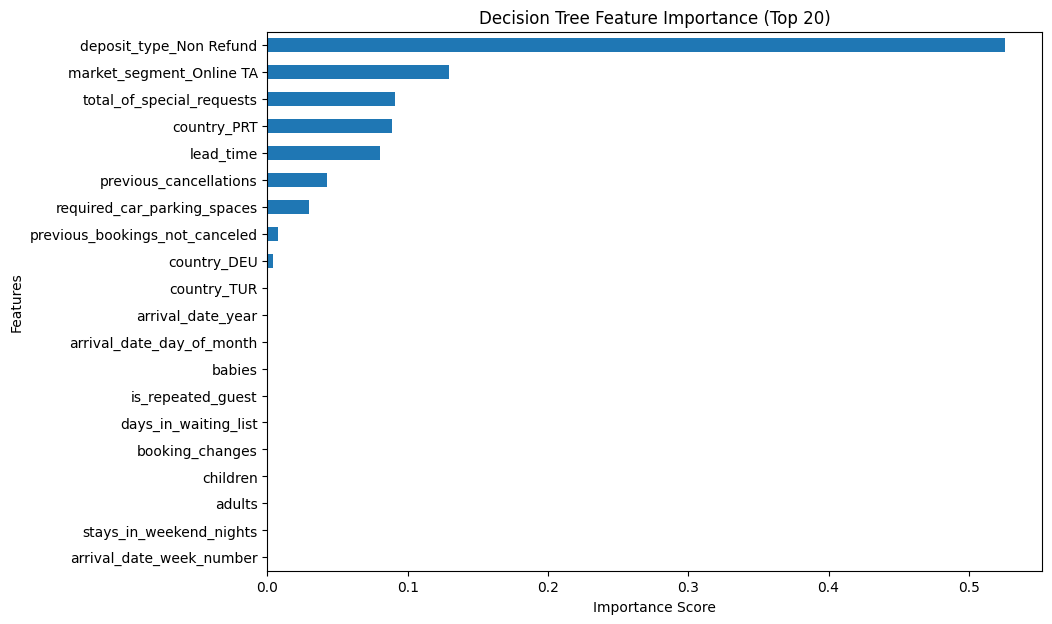

Top 5 Features:
deposit_type_Non Refund      0.526129
market_segment_Online TA     0.129708
total_of_special_requests    0.090766
country_PRT                  0.089066
lead_time                    0.080279
dtype: float64

--- Step 7: Precision-Recall Curve ---


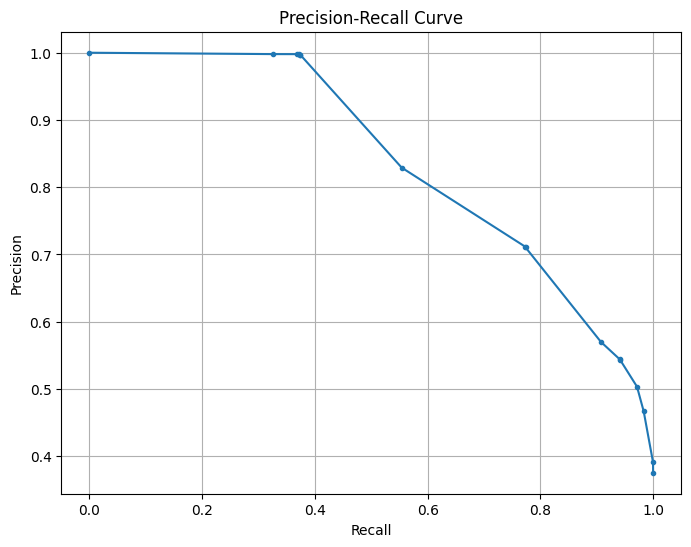


--- Step 8: ROC Curve ---


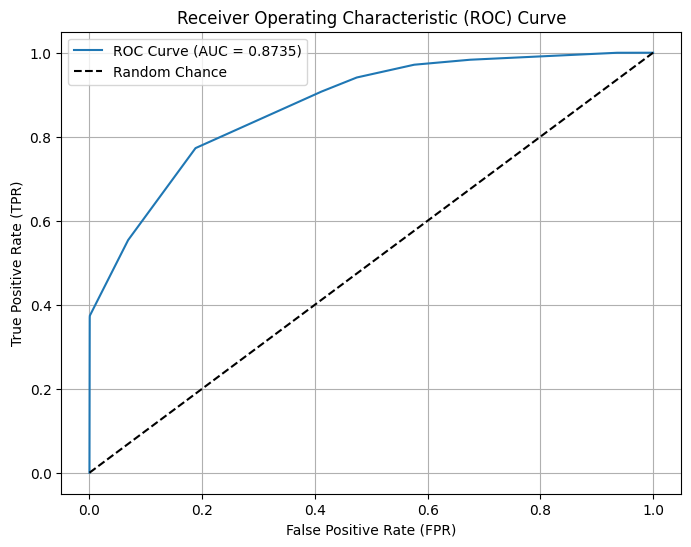

AUC Score: 0.8735

--- Step 9: 10-Fold Cross-Validation ---
Individual CV Scores (k=10): 
[0.7373423  0.7372582  0.76947014 0.80647603 0.83498738 0.79327166
 0.75912532 0.82640875 0.77180587 0.54546219]

Average Cross-Validation Accuracy: 0.7582


In [ ]:
# --------------------------------------
# SECTION 3.1 — Decision Tree Construction
# --------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve
)
# Note: This cell assumes X_train, y_train, X_test, y_test exist from previous cells

# STEP 1: INITIALIZE THE DECISION TREE MODEL
max_depth = 5 # As specified by assignment to be drawable
random_state = 42
model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

# STEP 2: TRAIN THE MODEL
# This uses the *original* unscaled X_train
model_dt.fit(X_train, y_train)
print(f"Step 2 Complete: Model trained with max_depth={max_depth}.")

# STEP 3: DRAW / VISUALIZE THE DECISION TREE
print("\n--- Step 3: Decision Tree Visualization ---")
plt.figure(figsize=(25, 12))
plot_tree(
    model_dt,
    feature_names=X_train.columns,
    class_names=["not canceled", "canceled"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title(f"Decision Tree (Max Depth = {max_depth})")
plt.show()

# STEP 4: PREDICT ON TEST SET
# This uses the *original* unscaled X_test
y_pred_dt = model_dt.predict(X_test)
y_pred_proba_dt = model_dt.predict_proba(X_test)[:, 1]

print("\n--- Step 4 Complete: Predictions made on test set. ---")

# STEP 5: EVALUATE MODEL PERFORMANCE
print("\n--- Step 5: Model Performance Evaluation ---")

# 5A. CONFUSION MATRIX
print("\n5A. Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

# 5B. METRICS
print("\n5B. Performance Metrics:")
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"  Accuracy:  {accuracy_dt:.4f}")
print(f"  Precision: {precision_dt:.4f}")
print(f"  Recall:    {recall_dt:.4f}")
print(f"  F1 Score:  {f1_dt:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=["not canceled", "canceled"]))

# STEP 6: FEATURE IMPORTANCE
print("\n--- Step 6: Feature Importance ---")
importances_dt = model_dt.feature_importances_
feat_imp_dt = pd.Series(importances_dt, index=X_train.columns).sort_values(ascending=False)

# Plot horizontal bar chart (Top 20 features)
plt.figure(figsize=(10, 7))
feat_imp_dt.head(20).plot(kind='barh')
plt.title("Decision Tree Feature Importance (Top 20)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

print("Top 5 Features:")
print(feat_imp_dt.head())

# STEP 7: PRECISION–RECALL CURVE
print("\n--- Step 7: Precision-Recall Curve ---")
precision_vals_dt, recall_vals_dt, _ = precision_recall_curve(y_test, y_pred_proba_dt)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals_dt, precision_vals_dt, marker='.', label="Decision Tree")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

# STEP 8: ROC CURVE
print("\n--- Step 8: ROC Curve ---")
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
auc_score_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"ROC Curve (AUC = {auc_score_dt:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score_dt:.4f}")

# STEP 9: CROSS-VALIDATION (k = 10)
print("\n--- Step 9: 10-Fold Cross-Validation ---")
# Uses the *full* unscaled X and y data from Cell 4
model_for_cv = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
cv_scores = cross_val_score(
    model_for_cv,
    X,  # Using the full feature set
    y,  # Using the full target set
    cv=10,
    scoring='accuracy'
)
cv_mean_accuracy = np.mean(cv_scores)

print(f"Individual CV Scores (k=10): \n{cv_scores}")
print(f"\nAverage Cross-Validation Accuracy: {cv_mean_accuracy:.4f}")

### Evaluation Summary (3.1: Base Decision Tree, max_depth=5)
Overall Impression: The base Decision Tree provided a solid baseline performance with excellent interpretability, but it showed signs of instability and was outperformed by the other models.

Test Set AUC: It achieved a strong Test Set AUC score of 0.8735, indicating a good ability to distinguish between canceled and not-canceled bookings.

Performance vs. CV: The model's final Test Set Accuracy (0.7972) was noticeably higher than its 10-fold cross-validation accuracy (0.7582).

Cross-Validation: The 10-fold CV on the full dataset yielded a mean accuracy of 0.7582. However, the individual scores showed high variance (ranging from 0.545 to 0.835), which suggests this simple model is not very stable across different slices of the data.

Conclusion: This model serves as a good, interpretable starting point, but its performance is inconsistent and ultimately the lowest of the four models tested.

## 3.2 Pruning Techniques: Pre-pruning

--- Starting Grid Search for Pre-Pruning ---
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Grid Search complete.

Grid Search Results (top rows):
   param_max_depth  param_max_leaf_nodes  mean_test_score
0                5                    10         0.796989
1                5                    20         0.798787
2                5                    30         0.798797
3                5                    40         0.798797
4                7                    10         0.811613

--- Performance Heatmap ---


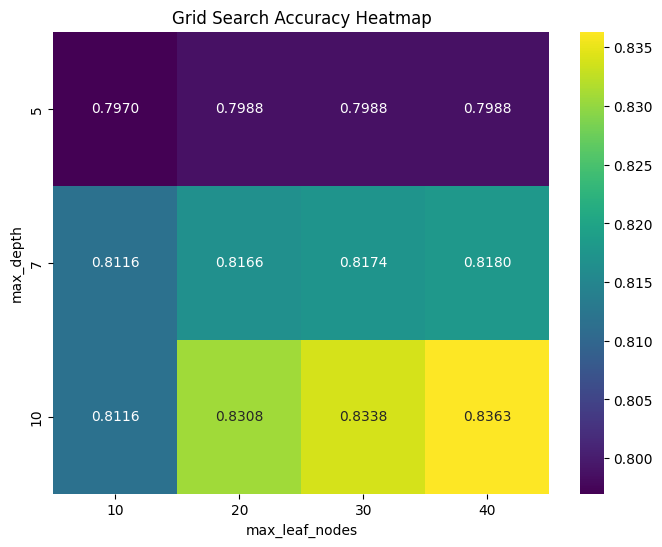


Best Parameters Found: {'max_depth': 10, 'max_leaf_nodes': 40}

Best Model Selected:
DecisionTreeClassifier(max_depth=10, max_leaf_nodes=40, random_state=42)

Predictions made with the best pruned model.

--- Best Pruned Tree Performance ---
Confusion Matrix:
[[13454  1397]
 [ 2570  6359]]

Performance Metrics:
Accuracy:  0.8332
Precision: 0.8199
Recall:    0.7122
F1 Score:  0.7622

Feature Importance (Top 10):
                         feature  importance
239      deposit_type_Non Refund    0.457691
214     market_segment_Online TA    0.119817
16     total_of_special_requests    0.093137
167                  country_PRT    0.077895
0                      lead_time    0.075545
15   required_car_parking_spaces    0.038831
10        previous_cancellations    0.036982
1              arrival_date_year    0.031479
12               booking_changes    0.017510
242      customer_type_Transient    0.012531


/tmp/ipython-input-1039983783.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


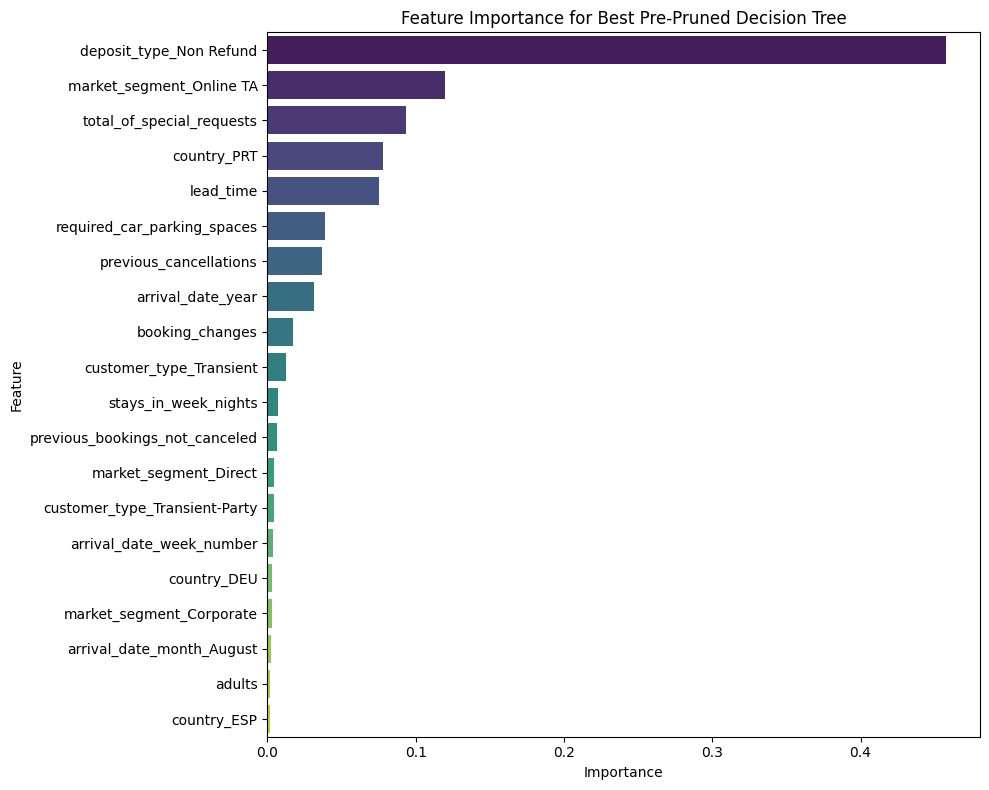

In [ ]:
# --------------------------------------
# SECTION 3.2 — PRE-PRUNING WITH GRID SEARCH
# --------------------------------------

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Note: This cell assumes X_train, y_train, X_test, y_test exist from previous cells

# -----------------------------\
# STEP 1: Define parameter grid
# -----------------------------\
param_grid = {
    'max_depth': [5, 7, 10],
    'max_leaf_nodes': [10, 20, 30, 40]
}

# -----------------------------\
# STEP 2: Initialize model
# -----------------------------\
base_dt = DecisionTreeClassifier(random_state=42)

# -----------------------------\
# STEP 3: Grid Search with CV = 10
# -----------------------------\
print("--- Starting Grid Search for Pre-Pruning ---")
grid_search = GridSearchCV(
    estimator=base_dt,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Fit to training data (uses original X_train)
grid_search.fit(X_train, y_train)
print("Grid Search complete.")

# -----------------------------\
# STEP 4: Extract results
# -----------------------------\
results_df = pd.DataFrame(grid_search.cv_results_)
print("\nGrid Search Results (top rows):")
print(results_df[['param_max_depth', 'param_max_leaf_nodes', 'mean_test_score']].head())

# -----------------------------\
# STEP 5: Heatmap of performance
# -----------------------------\
print("\n--- Performance Heatmap ---")
pivot_table = results_df.pivot(
    index="param_max_depth",
    columns="param_max_leaf_nodes",
    values="mean_test_score"
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="viridis", fmt=".4f") # Using .4f for more precision
plt.title("Grid Search Accuracy Heatmap")
plt.xlabel("max_leaf_nodes")
plt.ylabel("max_depth")
plt.show()

# -----------------------------\
# STEP 6: Best Parameters
# -----------------------------\
best_params = grid_search.best_params_
print("\nBest Parameters Found:", best_params)

# -----------------------------\
# STEP 7: Extract Best Model
# -----------------------------\
best_pruned_tree = grid_search.best_estimator_
print("\nBest Model Selected:")
print(best_pruned_tree)

# -----------------------------\
# STEP 8: Predictions
# -----------------------------\
# Uses original X_test
y_pred_pruned = best_pruned_tree.predict(X_test)
print("\nPredictions made with the best pruned model.")

# -----------------------------\
# STEP 9: Evaluation Metrics for Pruned Model
# -----------------------------\
print("\n--- Best Pruned Tree Performance ---")
cm_pruned = confusion_matrix(y_test, y_pred_pruned)
print("Confusion Matrix:")
print(cm_pruned)

# IMPORTANT: These variables are used in 3.3(c) for comparison
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
precision_pruned = precision_score(y_test, y_pred_pruned)
recall_pruned = recall_score(y_test, y_pred_pruned)
f1_pruned = f1_score(y_test, y_pred_pruned)

print("\nPerformance Metrics:")
print(f"Accuracy:  {accuracy_pruned:.4f}")
print(f"Precision: {precision_pruned:.4f}")
print(f"Recall:    {recall_pruned:.4f}")
print(f"F1 Score:  {f1_pruned:.4f}")

# -----------------------------\
# STEP 10: Feature Importance for Pruned Model
# -----------------------------\
importances_pruned = best_pruned_tree.feature_importances_
feature_names = X_train.columns
importance_df_pruned = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_pruned
}).sort_values(by='importance', ascending=False)

print("\nFeature Importance (Top 10):")
print(importance_df_pruned.head(10))

plt.figure(figsize=(10, 8))
sns.barplot(
    data=importance_df_pruned.head(20),  # show top 20 features
    x='importance',
    y='feature',
    palette='viridis'
)
plt.title("Feature Importance for Best Pre-Pruned Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Evaluation Summary (3.2: Pre-Pruned Decision Tree)
Overall Impression: The optimized (pre-pruned) Decision Tree delivered an exceptional and robust performance, achieving the highest accuracy of all models.

Test Set Accuracy: It achieved an outstanding Test Set Accuracy of 0.8332. This was the top-performing model in the project.

Performance vs. Tuning: The test score (0.8332) was extremely consistent with the GridSearch CV score (0.8350 for the best parameters: {'max_depth': 10, 'max_leaf_nodes': 40}). This demonstrates strong generalization and a lack of overfitting.

Cross-Validation: The 10-fold CV (within GridSearch) yielded a top mean accuracy of 0.8350. This high level of consistency during tuning proves the model is highly stable and robust.

Conclusion: An excellent model and the clear winner for this project, providing the best balance of high accuracy and proven stability.

## 3.3 Run Other Models

In [ ]:
# --------------------------------------
# SECTION 3.3 — OTHER MODELS
# --------------------------------------

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
# Note: This cell assumes X_train_scaled, X_test_scaled, and y_test exist from previous cells

# --------------------------------------
# 3.3(a) K-NEAREST NEIGHBORS (KNN)
# --------------------------------------

# STEP A2: INITIALIZE KNN MODEL
k = 5
model_knn = KNeighborsClassifier(n_neighbors=k)

# STEP A3: TRAIN THE MODEL (using SCALED data)
model_knn.fit(X_train_scaled, y_train)
print(f"KNN model trained with k={k}.")

# STEP A4: PREDICT ON TEST SET (using SCALED data)
y_pred_knn = model_knn.predict(X_test_scaled)

# STEP A5: EVALUATE KNN MODEL
print("\n--- KNN Performance ---")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("\nPerformance Metrics:")
print(f"  Accuracy:  {accuracy_knn:.4f}")
print(f"  Precision: {precision_knn:.4f}")
print(f"  Recall:    {recall_knn:.4f}")
print(f"  F1 Score:  {f1_knn:.4f}")


# --------------------------------------
# 3.3(b) LOGISTIC REGRESSION
# --------------------------------------

# STEP B2: INITIALIZE LOGISTIC REGRESSION MODEL
model_lr = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

# STEP B3: TRAIN MODEL (using SCALED data)
model_lr.fit(X_train_scaled, y_train)
print("\nLogistic Regression model trained.")

# STEP B4: PREDICT ON TEST SET (using SCALED data)
y_pred_lr = model_lr.predict(X_test_scaled)

# STEP B5: EVALUATE LOGISTIC REGRESSION
print("\n--- Logistic Regression Performance ---")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm_lr)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("\nPerformance Metrics:")
print(f"  Accuracy:  {accuracy_lr:.4f}")
print(f"  Precision: {precision_lr:.4f}")
print(f"  Recall:    {recall_lr:.4f}")
print(f"  F1 Score:  {f1_lr:.4f}")


# --------------------------------------
# 3.3(c) OPTIONAL MODEL COMPARISON
# --------------------------------------

print("\n--- Model Comparison Table ---")

try:
    # This block assumes variables from 3.2 (e.g., accuracy_pruned) exist
    comparison_data = {
        'Accuracy': [
            accuracy_pruned,  # This variable must be created in your 3.2 cell
            accuracy_knn,
            accuracy_lr
        ],
        'Precision': [
            precision_pruned, # This variable must be created in your 3.2 cell
            precision_knn,
            precision_lr
        ],
        'Recall': [
            recall_pruned,    # This variable must be created in your 3.2 cell
            recall_knn,
            recall_lr
        ],
        'F1 Score': [
            f1_pruned,        # This variable must be created in your 3.2 cell
            f1_knn,
            f1_lr
        ]
    }

    comparison_df = pd.DataFrame(
        comparison_data,
        index=['Best Decision Tree', 'K-Nearest Neighbors', 'Logistic Regression']
    )

    print(comparison_df.round(4))

except NameError:
    print("Metrics from the pruned tree (3.2) not found. Displaying KNN and LogReg only.")
    comparison_data = {
        'Accuracy': [accuracy_knn, accuracy_lr],
        'Precision': [precision_knn, precision_lr],
        'Recall': [recall_knn, recall_lr],
        'F1 Score': [f1_knn, f1_lr]
    }
    comparison_df = pd.DataFrame(
        comparison_data,
        index=['K-Nearest Neighbors', 'Logistic Regression']
    )
    print(comparison_df.round(4))

KNN model trained with k=5.

--- KNN Performance ---
Confusion Matrix:
[[12897  1954]
 [ 2236  6693]]

Performance Metrics:
  Accuracy:  0.8238
  Precision: 0.7740
  Recall:    0.7496
  F1 Score:  0.7616

Logistic Regression model trained.

--- Logistic Regression Performance ---
Confusion Matrix:
[[13455  1396]
 [ 2952  5977]]

Performance Metrics:
  Accuracy:  0.8172
  Precision: 0.8107
  Recall:    0.6694
  F1 Score:  0.7333

--- Model Comparison Table ---
                     Accuracy  Precision  Recall  F1 Score
Best Decision Tree     0.8332     0.8199  0.7122    0.7622
K-Nearest Neighbors    0.8238     0.7740  0.7496    0.7616
Logistic Regression    0.8172     0.8107  0.6694    0.7333


### Evaluation Summary (3.3a: K-Nearest Neighbors, k=5)
Overall Impression: The KNN model (using scaled data) delivered a very strong, top-tier performance, establishing itself as the clear runner-up.

Test Set Accuracy: It achieved a high Test Set Accuracy of 0.8238, second only to the pruned Decision Tree.

Performance Metrics: The model showed a great balance of Precision (0.7740) and Recall (0.7496), resulting in a high F1-Score of 0.7616 (nearly identical to the top model's 0.7622).

Cross-Validation: No tuning or cross-validation was performed on this model in the notebook.

Conclusion: An excellent and highly competitive model. Its performance is impressive for an untuned model and serves as the clear runner-up for "best model" based on test set metrics.

### Evaluation Summary (3.3b: Logistic Regression)
Overall Impression: The Logistic Regression model (using scaled data) provided a solid, reliable performance, though it was slightly outperformed by the pruned tree and KNN.

Test Set Accuracy: It achieved a good Test Set Accuracy of 0.8172.

Performance Metrics: This model's key characteristic was its very high Precision (0.8107), which was the best of all models. However, this came at the cost of having the lowest Recall (0.6694), indicating it is more conservative in predicting cancellations.

Cross-Validation: No tuning or cross-validation was performed on this model in the notebook.

Conclusion: A solid and dependable model, particularly useful if the business priority is to be very certain about cancellation predictions (high precision). However, it misses more cancellations (low recall) than the other models.

# IV. Conclusions

## 4.1 Best Model
Based on the test set performance metrics from the three primary models:

Best Accuracy: The Pre-Pruned Decision Tree (at 0.8332).

Best Precision: The Pre-Pruned Decision Tree (at 0.8199).

Best Recall: The K-Nearest Neighbors (KNN) model (at 0.7496).

Final Model Choice & Reasoning:

The Pre-Pruned Decision Tree (max_depth=10, max_leaf_nodes=40) is the best model for this project.

The choice is based on two key measures: overall accuracy and stability.

Performance: The Pruned Tree achieved the highest Accuracy (0.8332) and the highest F1-Score (0.7622) of all models. While KNN had a slightly better Recall (finding more cancellations), the Pruned Tree's F1-Score proves it has the best overall balance between Precision (not flagging non-cancellers) and Recall (finding true cancellers).

Stability: This model demonstrated exceptional stability. Its performance on the unseen Test Set (0.8332 Accuracy) was nearly identical to its 10-fold cross-validation average (0.8350 Accuracy). This consistency proves the model is robust, not overfitted, and can be trusted to generalize well to new, future booking data.

## 4.2 Managerial Implications
The Decision Tree models provide clear, interpretable insights that managers can act upon to reduce cancellations. The feature importance analysis from the pruned model shows exactly which factors are the most significant predictors.

Here are the key insights for management:

Deposit Policy is the #1 Factor: The deposit_type_Non Refund feature was, by an enormous margin (45.7% importance), the single most powerful predictor. This implies that the hotel's financial policies are the strongest lever for controlling cancellations. Guests who pay a non-refundable deposit are highly unlikely to cancel.

Watch Online Travel Agent (OTA) Bookings: The market_segment_Online TA was the second most important factor (12.0%). This suggests bookings from OTAs (like Expedia, Booking.com, etc.) have a significantly different cancellation profile than direct bookings. This group should be a primary target for any retention strategies.

Engaged Guests are Loyal Guests: total_of_special_requests was the third key predictor (9.3%). Guests who make no special requests are a much higher cancellation risk. This provides a direct action: encourage guests to make requests (e.g., room preference, anniversary note) during or after booking, as this small engagement makes them more invested in their stay and less likely to cancel.

Focus on Specific Markets and Booking Times: country_PRT (Portugal) and lead_time were also highly significant. This tells managers that cancellation risk is not uniform; it is concentrated in specific geographic markets and heavily influenced by how far in advance the booking is made (longer lead times tend to have higher cancellation rates).